<a href="https://colab.research.google.com/github/Seongjin1225/AI-School-9_Mid_Project_Team2/blob/main/%EA%B0%9C%EC%9D%B8%20%EC%BD%94%EB%93%9C/Mid_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울 ~ 전국으로 가는 택배 물량 파트
- 관련 데이터 전처리 및 시각화


- 요일별 배송량 막대그래프 / 파이그래프
- folium 전국 시도/ 서울 자치구별 지도 시각화 (수령/발송 or 수령발송 통합 or 3개전부?)
- 명절과 명절 제외 차이 시각화(데이터 선정 방법 고민하기 : 일별평균 or 동일기간 설정 후 배송량의 총합 / 효과적인 시각화 방법은 무엇일지 -:한 화면에 여러개의 바 그래프 그려서 비교하기 쉽게 만들기)
- 설과 추석기간 비교하기(명절기간 전후로 막대 그래프 그릴 시, 명절 당일막대는 빨간색으로 강조표시하면 시각적으로 좋을듯함 / 범례 따로 지정 가능하면 설or추석 따로 표기하면 좋을듯)
- 1년 데이터의 일별 전체 물량으로 어떤 시기에 몰리는지 확인해보기(가로 점선으로 특정량 넘기는 날 보기 편하게 만들수도 있을듯)
- 33개월치(21~23.9) 데이터로 분기별 택배량 변화 추이(꺾은선 그래프)
-기계학습으로 향후 택배량 전망 예측해보기(prophet)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 데이터 불러오기 - (서울 ~ 전국)
data = glob.glob(r'/content/drive/MyDrive/Mid_Project/서울-전국/from_seoul_*.csv')
data.sort(reverse=True)

head_df = pd.read_csv('/content/drive/MyDrive/Mid_Project/서울-전국/from_seoul_2309.csv',encoding='cp949')
col = head_df.columns
from_seoul = pd.DataFrame()

for file in data:
    df = pd.read_csv(file,encoding='cp949')
    df.columns = col
    from_seoul = pd.concat([from_seoul,df])

from_seoul

# 결측치 확인
from_seoul.isnull().sum()

# 필요없는 컬럼 제거
from_seoul.drop(['송하인_시코드', '송하인_구코드', '수하인_시코드'],axis=1,inplace=True)
from_seoul.columns

# 컬럼 이름 변경
from_seoul.rename(columns={'대분류_착지물동량 가구/인테리어':'가구/인테리어', '대분류_착지물동량 기타':'기타',
                            '대분류_착지물동량 도서/음반':'도서/음반', '대분류_착지물동량 디지털/가전':'디지털/가전',
                            '대분류_착지물동량 생활/건강':'생활/건강','대분류_착지물동량 스포츠/레저':'스포츠/레저',
                            '대분류_착지물동량 식품':'식품', '대분류_착지물동량 출산/육아':'출산/육아',
                            '대분류_착지물동량 패션의류':'패션의류', '대분류_착지물동량 패션잡화':'패션잡화',
                            '대분류_착지물동량 화장품/미용':'화장품/미용'},inplace=True)
from_seoul.columns
from_seoul.dtypes

# 날짜 컬럼 dtype 변경
from_seoul['배송년월일'] = from_seoul['배송년월일'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
from_seoul.dtypes

# 합계 추가
from_seoul['총합'] = from_seoul.sum(axis=1)
from_seoul.head()


<ipython-input-1-4f3f956b8504>:44: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from_seoul['총합'] = from_seoul.sum(axis=1)


,배송년월일,송하인_시명,송하인_구명,수하인_시명,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총합
0,2023-09-30,서울특별시,강동구,경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-09-30,서울특별시,강남구,경상남도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-09-30,서울특별시,강남구,경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-09-30,서울특별시,강남구,서울특별시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-09-30,서울특별시,서초구,경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


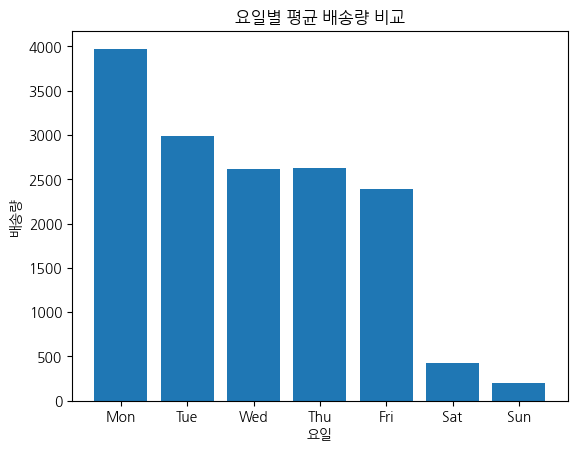

([<matplotlib.patches.Wedge at 0x786b30f60130>,
 [Text(0.7499410111295773, 0.8047288237822399, 'Mon'),
  Text(-0.6983437142942667, 0.8498917911744341, 'Tue'),
  Text(-1.0585693591562921, -0.29905001564192724, 'Wed'),
  Text(-0.23209599820650895, -1.0752355312286348, 'Thu'),
  Text(0.8061907022586376, -0.7483692615224953, 'Fri'),
  Text(1.084480310393768, -0.18412619685486575, 'Sat'),
  Text(1.0990898682975092, -0.04473769557949972, 'Sun')],
 [Text(0.40905873334340576, 0.4389429947903126, '26.1%'),
  Text(-0.38091475325141816, 0.4635773406406004, '19.7%'),
  Text(-0.5774014686307047, -0.1631181903501421, '17.2%'),
  Text(-0.12659781720355032, -0.5864921079428916, '17.3%'),
  Text(0.439740383050166, -0.4082014153759065, '15.7%'),
  Text(0.591534714760237, -0.10043247101174495, '2.8%'),
  Text(0.599503564525914, -0.024402379406999845, '1.3%')])

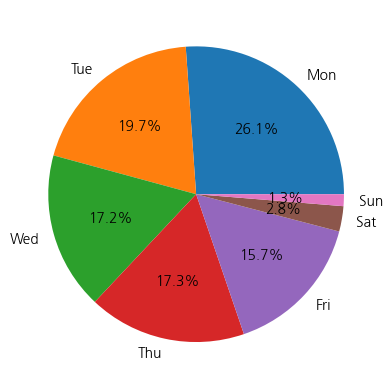

In [ ]:
# 요일별 배송량 시각화
#data2021["요일"] = pd.to_datetime(data2021["Date"]).dt.day_name()

# 요일 컬럼 추가
from_seoul['요일'] = pd.to_datetime(from_seoul['배송년월일']).dt.day_name()
from_seoul.head()

# 각 요일별 컬럼 뽑아내기
mon = from_seoul[from_seoul['요일']== 'Monday']['총합'].mean()
tue = from_seoul[from_seoul['요일']== 'Tuesday']['총합'].mean()
wed = from_seoul[from_seoul['요일']== 'Wednesday']['총합'].mean()
thu = from_seoul[from_seoul['요일']== 'Thursday']['총합'].mean()
fri = from_seoul[from_seoul['요일']== 'Friday']['총합'].mean()
sat = from_seoul[from_seoul['요일']== 'Saturday']['총합'].mean()
sun = from_seoul[from_seoul['요일']== 'Sunday']['총합'].mean()

week = [mon, tue, wed, thu, fri, sat, sun]
week = pd.DataFrame(week)
week.columns = ['배송량']

# 막대 그래프 시각화
label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
index = np.arange(len(label))

plt.rc('font', family='NanumGothic')
plt.bar(index, week['배송량'])
plt.xlabel('요일')
plt.ylabel('배송량')
plt.title('요일별 평균 배송량 비교')
plt.xticks(index, label)

plt.show()


# 파이 그래프 시각화
plt.pie(week['배송량'], labels = label, autopct='%.1f%%')

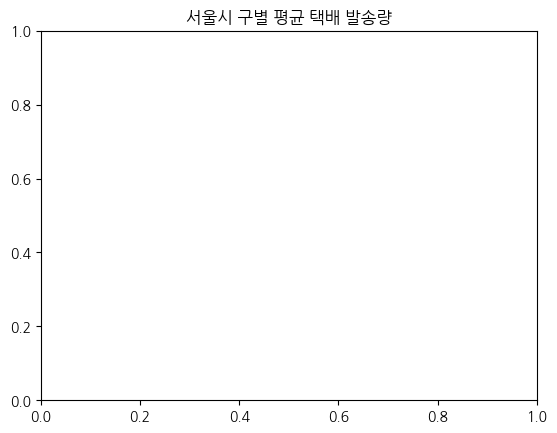

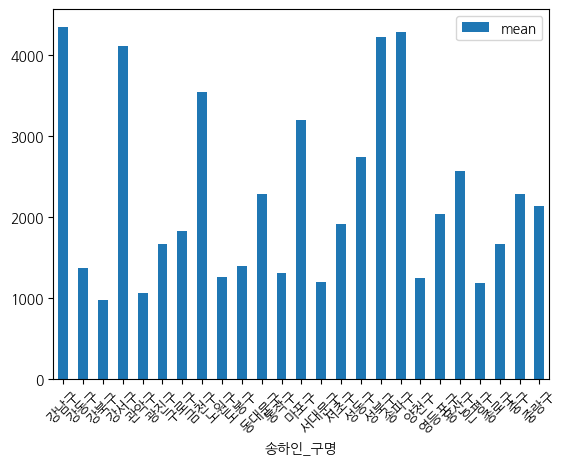

In [ ]:
# 가설 2번 부분
# 서울시 구별 택배 발송량 확인
data = from_seoul[from_seoul['송하인_시명']=='서울특별시']
data

# 구별 택배 발송량 확인이므로 groupby
send = data.groupby('송하인_구명')['총합'].agg(['mean'])

plt.title('서울시 구별 평균 택배 발송량')
send.plot.bar(rot=45, label='평균 발송량')
plt.legend()


# 분기별 평균 발송량 변화 차이

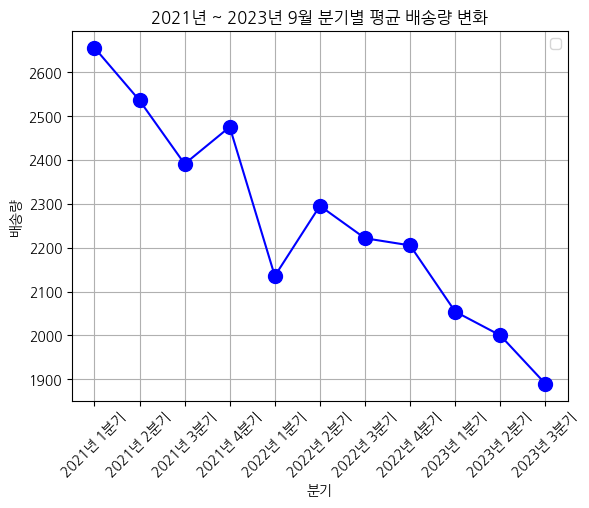

In [ ]:
# 1년에 분기 4개 있음 --> 2021년 ~ 2023년 9월까지 이므로
# 총 11개의 분기 생성

con_1 = from_seoul['배송년월일'].between('2021-01-01', '2021-04-01',inclusive='left')
quarter_1 = from_seoul[con_1]['총합'].mean()

con_2 = from_seoul['배송년월일'].between('2021-04-01', '2021-07-01',inclusive='left')
quarter_2 = from_seoul[con_2]['총합'].mean()

con_3 = from_seoul['배송년월일'].between('2021-07-01', '2021-10-01',inclusive='left')
quarter_3 = from_seoul[con_3]['총합'].mean()

con_4 = from_seoul['배송년월일'].between('2021-10-01', '2022-01-01',inclusive='left')
quarter_4 = from_seoul[con_4]['총합'].mean()

con_5 = from_seoul['배송년월일'].between('2022-01-01', '2022-04-01',inclusive='left')
quarter_5 = from_seoul[con_5]['총합'].mean()

con_6 = from_seoul['배송년월일'].between('2022-04-01', '2022-07-01',inclusive='left')
quarter_6 = from_seoul[con_6]['총합'].mean()

con_7 = from_seoul['배송년월일'].between('2022-07-01', '2022-10-01',inclusive='left')
quarter_7 = from_seoul[con_7]['총합'].mean()

con_8 = from_seoul['배송년월일'].between('2022-10-01', '2023-01-01',inclusive='left')
quarter_8 = from_seoul[con_8]['총합'].mean()

con_9 = from_seoul['배송년월일'].between('2023-01-01', '2023-04-01',inclusive='left')
quarter_9 = from_seoul[con_9]['총합'].mean()

con_10 = from_seoul['배송년월일'].between('2023-04-01', '2023-07-01',inclusive='left')
quarter_10 = from_seoul[con_10]['총합'].mean()

con_11 = from_seoul['배송년월일'].between('2023-07-01', '2023-10-01',inclusive='left')
quarter_11 = from_seoul[con_11]['총합'].mean()


# 분기별 라인 그래프로 시각화
quarter = [quarter_1, quarter_2, quarter_3, quarter_4, quarter_5, quarter_6, quarter_7, quarter_8, quarter_9, quarter_10, quarter_11]
quarter = pd.DataFrame(quarter)

label = ['2021년 1분기', '2021년 2분기', '2021년 3분기', '2021년 4분기', '2022년 1분기', '2022년 2분기', '2022년 3분기', '2022년 4분기', '2023년 1분기', '2023년 2분기', '2023년 3분기']

plt.plot(label, quarter, 'bo-',markersize=10)
plt.title('2021년 ~ 2023년 9월 분기별 평균 배송량 변화')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('배송량')
plt.grid()
plt.legend()

# 년도별 평균 발송량 변화 차이

<ipython-input-5-4a5161bd3195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['월'] = pd.to_datetime(data_2021['배송년월일']).dt.month
<ipython-input-5-4a5161bd3195>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['월'] = pd.to_datetime(data_2022['배송년월일']).dt.month
<ipython-input-5-4a5161bd3195>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

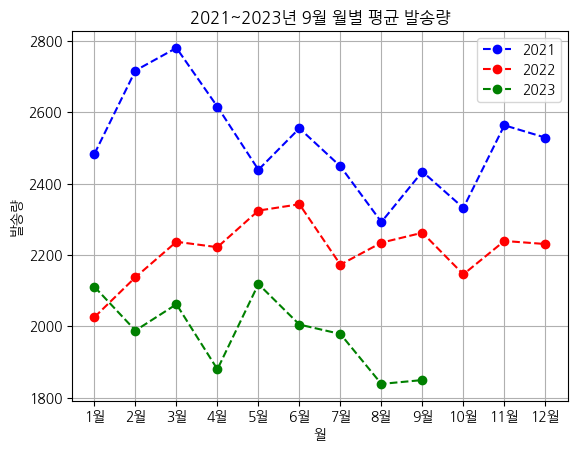

In [ ]:
# 필요 데이터 전처리 과정
first =from_seoul['배송년월일'].between('2021-01-01', '2021-12-31')
data_2021 = from_seoul[first]
data_2021['월'] = pd.to_datetime(data_2021['배송년월일']).dt.month
monthly_average_2021 = data_2021.groupby('월')['총합'].mean()

second =from_seoul['배송년월일'].between('2022-01-01', '2022-12-31')
data_2022 = from_seoul[second]
data_2022['월'] = pd.to_datetime(data_2022['배송년월일']).dt.month
monthly_average_2022 = data_2022.groupby('월')['총합'].mean()

third =from_seoul['배송년월일'].between('2023-01-01', '2023-09-30')
data_2023 = from_seoul[third]
data_2023['월'] = pd.to_datetime(data_2023['배송년월일']).dt.month
monthly_average_2023 = data_2023.groupby('월')['총합'].mean()

# 시각화
label = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
index = np.arange(1,len(label)+1)

plt.plot(monthly_average_2021, 'bo--', label='2021')
plt.plot(monthly_average_2022, 'ro--', label='2022')
plt.plot(monthly_average_2023, 'go--', label='2023')

plt.title('2021~2023년 9월 월별 평균 발송량')
plt.xticks(index, label)
plt.xlabel('월')
plt.ylabel('발송량')
plt.legend()
plt.grid()

# 설연휴 배송량 top5 카테고리

In [ ]:
# 설 연휴 전후 배송량 차이 비교 - 구간 정하는게 상당히 애매해서 어려웠다,
# 2021년 설 연휴 전후 --> 2021-02-01 ~ 2021-02-21
# 2022년 설 연휴 전후 --> 2022-01-24 ~ 2022-02-13
# 2023년 설 연휴 전후 --> 2023-01-16 ~ 2023-01-29

# 필요 데이터 추출
con_2021 = from_seoul['배송년월일'].between('2021-02-01', '2021-02-21')
new_2021 = from_seoul[con_2021]

con_2022 = from_seoul['배송년월일'].between('2022-01-24', '2022-02-13')
new_2022 = from_seoul[con_2022]

con_2023 = from_seoul['배송년월일'].between('2023-01-16', '2023-01-29')
new_2023 = from_seoul[con_2023]

# 데이터 전처리

new_2021.drop(['총합'],axis=1, inplace=True)
stat_2021 = new_2021.groupby('배송년월일').sum()
stat_1 = stat_2021.sum().nlargest(5)

new_2022.drop(['총합'],axis=1, inplace=True)
stat_2022 = new_2022.groupby('배송년월일').sum()
stat_2 = stat_2022.sum().nlargest(5)

new_2023.drop(['총합'],axis=1, inplace=True)
stat_2023 = new_2023.groupby('배송년월일').sum()
stat_3 = stat_2023.sum().nlargest(5)


<ipython-input-6-ce191a51084e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2021.drop(['총합'],axis=1, inplace=True)
<ipython-input-6-ce191a51084e>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stat_2021 = new_2021.groupby('배송년월일').sum()
<ipython-input-6-ce191a51084e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_2022.drop(['총합'],axis=1, inplace=True)
<ipython-input-6-ce191a51084e>:23: FutureWarning: The default

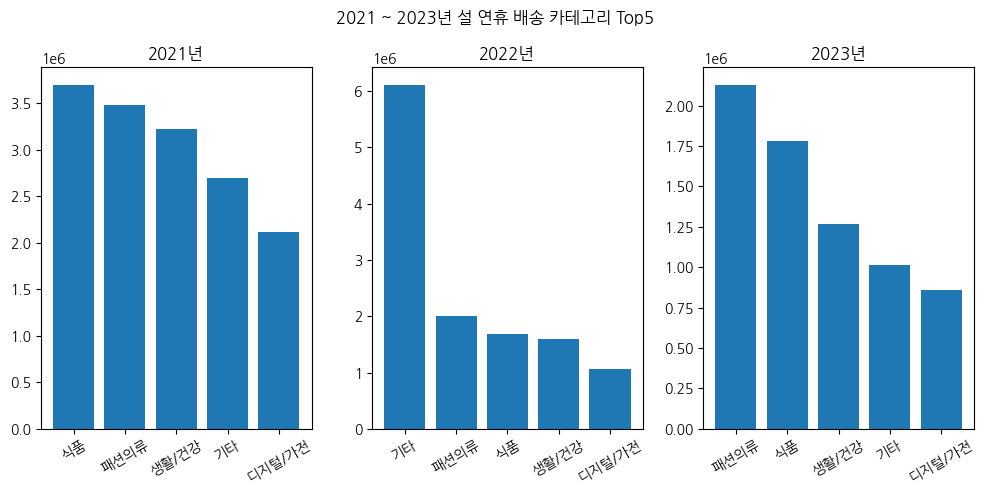

In [ ]:
# 시각화
fig = plt.figure(figsize=(10,5))
plt.suptitle('2021 ~ 2023년 설 연휴 배송 카테고리 Top5')

fig.add_subplot(1,3,1)
plt.title('2021년')
plt.bar(stat_1.index, stat_1.values)
plt.xticks(rotation=30)

fig.add_subplot(1,3,2)
plt.title('2022년')
plt.bar(stat_2.index, stat_2.values)
plt.xticks(rotation=30)

fig.add_subplot(1,3,3)
plt.title('2023년')
plt.bar(stat_3.index, stat_3.values)
plt.xticks(rotation=30)

plt.tight_layout()

# 추석 연휴 배송량 top5 카테고리

In [ ]:
# 기간 정하기
# 2021년 추석 연휴 -> 2021-09-13 ~ 2021-09-25
# 2022년 추석 연휴 -> 2022-09-05 ~ 2021-09-16
# 2023년 추석 연휴 -> 2023-09-20 ~ 2023-09-27
# 필요 데이터 추출
cond_2021 = from_seoul['배송년월일'].between('2021-09-13', '2021-09-25')
holi_2021 = from_seoul[cond_2021]

cond_2022 = from_seoul['배송년월일'].between('2022-09-05', '2022-09-16')
holi_2022 = from_seoul[cond_2022]

cond_2023 = from_seoul['배송년월일'].between('2023-09-20', '2023-09-27')
holi_2023 = from_seoul[cond_2023]

# 데이터 전처리

holi_2021.drop(['총합'],axis=1, inplace=True)
stats_2021 = holi_2021.groupby('배송년월일').sum()
stats_1 = stats_2021.sum().nlargest(5)

holi_2022.drop(['총합'],axis=1, inplace=True)
stats_2022 = holi_2022.groupby('배송년월일').sum()
stats_2 = stats_2022.sum().nlargest(5)

holi_2023.drop(['총합'],axis=1, inplace=True)
stats_2023 = holi_2023.groupby('배송년월일').sum()
stats_3 = stats_2023.sum().nlargest(5)

<ipython-input-8-fb19426954ee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holi_2021.drop(['총합'],axis=1, inplace=True)
<ipython-input-8-fb19426954ee>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_2021 = holi_2021.groupby('배송년월일').sum()
<ipython-input-8-fb19426954ee>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holi_2022.drop(['총합'],axis=1, inplace=True)
<ipython-input-8-fb19426954ee>:22: FutureWarning: The def

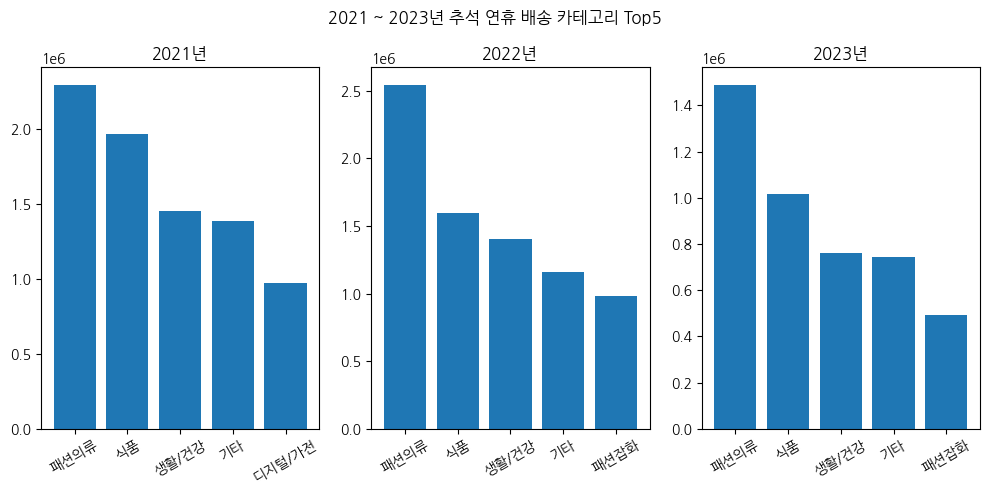

In [ ]:
# 시각화
fig = plt.figure(figsize=(10,5))
plt.suptitle('2021 ~ 2023년 추석 연휴 배송 카테고리 Top5')

fig.add_subplot(1,3,1)
plt.title('2021년')
plt.bar(stats_1.index, stats_1.values)
plt.xticks(rotation=30)

fig.add_subplot(1,3,2)
plt.title('2022년')
plt.bar(stats_2.index, stats_2.values)
plt.xticks(rotation=30)

fig.add_subplot(1,3,3)
plt.title('2023년')
plt.bar(stats_3.index, stats_3.values)
plt.xticks(rotation=30)

plt.tight_layout()

# 카테고리별 발송량 top5 구 시각화

In [ ]:
# 가구/인테리어 , 기타, 도서/음반, 디지털/가전, 생활/건강, 스포츠/레저, 식품, 출산/육아, 패션의류, 패션잡화, 화장품/미용
# subplot(4,3,)
# 1. 가구 인테리어
furni= from_seoul[['송하인_구명','가구/인테리어']].groupby('송하인_구명').sum()
furniture = furni['가구/인테리어'].nlargest(5)

# 2. 기타
other = from_seoul[['송하인_구명', '기타']].groupby('송하인_구명').sum()
others = other['기타'].nlargest(5)

# 3. 도서/음반
books = from_seoul[['송하인_구명', '도서/음반']].groupby('송하인_구명').sum()
book = books['도서/음반'].nlargest(5)

# 4. 디지털/가전
digi = from_seoul[['송하인_구명', '디지털/가전']].groupby('송하인_구명').sum()
digital = digi['디지털/가전'].nlargest(5)

# 5. 생활/건강
lifes = from_seoul[['송하인_구명', '생활/건강']].groupby('송하인_구명').sum()
life = lifes['생활/건강'].nlargest(5)

# 6. 스포츠/레저
sport = from_seoul[['송하인_구명', '스포츠/레저']].groupby('송하인_구명').sum()
sports = sport['스포츠/레저'].nlargest(5)

# 7. 식품
foods = from_seoul[['송하인_구명', '식품']].groupby('송하인_구명').sum()
food = foods['식품'].nlargest(5)

# 8. 출산/육아
babys = from_seoul[['송하인_구명', '출산/육아']].groupby('송하인_구명').sum()
baby = babys['출산/육아'].nlargest(5)

# 9. 패션의류
cloth = from_seoul[['송하인_구명', '패션의류']].groupby('송하인_구명').sum()
clothes = cloth['패션의류'].nlargest(5)

# 10. 패션잡화
accs = from_seoul[['송하인_구명', '패션잡화']].groupby('송하인_구명').sum()
acc = accs['패션잡화'].nlargest(5)

# 11. 화장품/미용
beautys = from_seoul[['송하인_구명', '화장품/미용']].groupby('송하인_구명').sum()
beauty = beautys['화장품/미용'].nlargest(5)


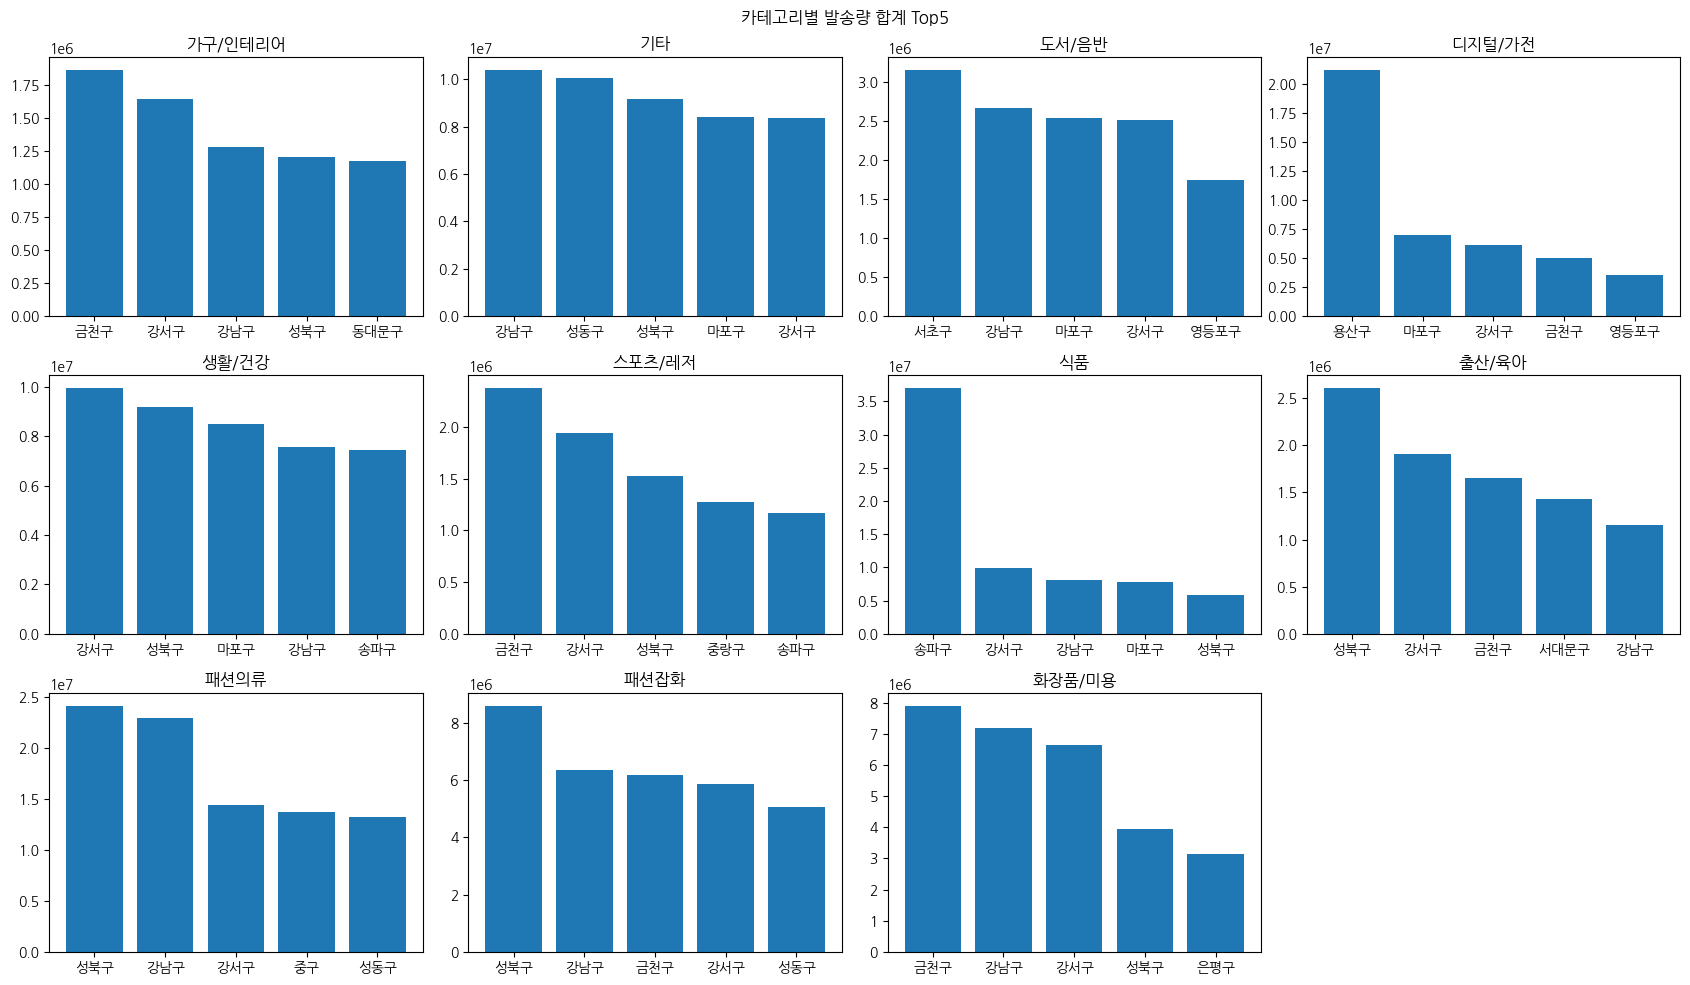

In [ ]:
# 시각화
fig = plt.figure(figsize=(17,10))
plt.rc('font', family='NanumGothic')
plt.suptitle('카테고리별 발송량 합계 Top5')


fig.add_subplot(3,4,1)
plt.title('가구/인테리어')
plt.bar(furniture.index, furniture.values)

fig.add_subplot(3,4,2)
plt.title('기타')
plt.bar(others.index, others.values)

fig.add_subplot(3,4,3)
plt.title('도서/음반')
plt.bar(book.index, book.values)

fig.add_subplot(3,4,4)
plt.title('디지털/가전')
plt.bar(digital.index, digital.values)

fig.add_subplot(3,4,5)
plt.title('생활/건강')
plt.bar(life.index, life.values)

fig.add_subplot(3,4,6)
plt.title('스포츠/레저')
plt.bar(sports.index, sports.values)

fig.add_subplot(3,4,7)
plt.title('식품')
plt.bar(food.index, food.values)

fig.add_subplot(3,4,8)
plt.title('출산/육아')
plt.bar(baby.index, baby.values)

fig.add_subplot(3,4,9)
plt.title('패션의류')
plt.bar(clothes.index, clothes.values)

fig.add_subplot(3,4,10)
plt.title('패션잡화')
plt.bar(acc.index, acc.values)

fig.add_subplot(3,4,11)
plt.title('화장품/미용')
plt.bar(beauty.index, beauty.values)

plt.tight_layout()
plt.show()

# 지도 시각화

In [ ]:
# 라이브러리 호출
import folium
import webbrowser
import json
import geopandas as gpd
from folium import Map, Choropleth, Marker
from folium.features import DivIcon

# 데이터 전처리
change = {'강원도':'강원특별자치도'}
from_seoul['수하인_시명'] = from_seoul['수하인_시명'].apply(lambda x:change.get(x,x))
from_seoul['수하인_시명'].unique()

need = from_seoul['수하인_시명'] != '서울특별시'
df = from_seoul[need]
df = df['수하인_시명'].value_counts().reset_index()
df.columns = ['City', 'Count']

# 지도 시각화
geo_path = '/content/drive/MyDrive/Mid_Project/Map_Info/Si_Do_map_utf8.json'

with open(geo_path, 'r', encoding='euc-kr') as f:
    geo_data = json.load(f)

m = folium.Map(location=[36.45, 127.42], zoom_start=8)
folium.Choropleth(
    geo_data=geo_data,
    data=df,
    columns=['City', 'Count'],
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.5
).add_to(m)

# 지도 위 텍스트 표기
locs = {
    '경기도': (37.95, 126.95),
    '부산광역시':(35.198362, 129.053922),
    '경상북도':  (36.63, 128.46),
    '경상남도': (35.5, 128),
    '인천광역시':  (37.5, 125.8),
    '대구광역시': (35.96, 128.32),
    '충청남도': (36.69, 126),
    '전라남도':  (34.819400, 126.893113),
    '전라북도':  (35.86, 126.85),
    '대전광역시':   (36.321655, 127.378953),
    '강원도': (37.88, 128),
    '광주광역시': (35.28, 126.49),
    '울산광역시': (35.8, 129.5),
    '충청북도': (37.19, 127.50),
    '세종특별자치시': (36.7, 127.07),
    '제주특별자치도': (33.62, 126.11),
}

for key, value in locs.items():
    Marker(
        [value[0], value[1]],
        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 1.5rem; color: black; background-color:rgba(255, 255, 255, 0.2); width:85px; '\
            f'text-align:center; margin:0px;"><b>{key}</b></div>'
        )
    ).add_to(m)
m

# 지도 시각화 2

In [ ]:
# 서울 각 구 평균 배송량 표시
import folium
import json
import pandas as pd

# 지도 생성
seoul_map = folium.Map(location=[37.56, 126.97], zoom_start=12)

locs = {"강동구":(37.55591, 127.1354),
        "송파구":(37.51102, 127.1016),
        "강남구":(37.49829, 127.0394),
        "서초구":(37.48855, 126.9878),
        "동작구":(37.50472, 126.9420),
        "관악구":(37.47081, 126.9270),
        "금천구":(37.45604, 126.8963),
        "영등포구":(37.52560, 126.9041),
        "용산구":(37.53801, 126.9709),
        "구로구":(37.49910, 126.8334),
        "양천구":(37.52323, 126.8405),
        "강서구":(37.56192, 126.8082),
        "마포구":(37.56212, 126.8876),
        "서대문구":(37.57946, 126.9206),
        "은평구":(37.61690, 126.9134),
        "중구":(37.56211, 126.9815),
        "종로구":(37.58347, 126.9726),
        "광진구":(37.54771, 127.0695),
        "성동구":(37.55151, 127.0311),
        "동대문구":(37.58462, 127.0380),
        "성북구":(37.60572, 127.0084),
        "중랑구":(37.60120, 127.0799),
        "노원구":(37.64055, 127.0651),
        "강북구":(37.63934, 126.9999),
        "도봉구":(37.67042, 127.0195)}


# 데이터 전처리
# 배송 데이터에서 필요한 열만 선택하고 구별로 평균을 계산합니다
df = from_seoul[['배송년월일', '송하인_구명', '총합']]
df = df.groupby('송하인_구명')['총합'].mean().reset_index()

# 서울시 구별 경계 데이터
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# Choropleth를 사용하여 지도에 시각화합니다
folium.Choropleth(
    geo_data=state_geo,
    data=df,
    columns=['송하인_구명', '총합'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.3,
    color='black',
    legend_name='평균 배송량'
).add_to(seoul_map)

# 지도 위 텍스트 표시
for key, value in locs.items():
    Marker(
        [value[0], value[1]],
        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 1.5rem; color: black; background-color:rgba(255, 255, 255, 0.2); width:85px; '\
            f'text-align:center; margin:0px;"><b>{key}</b></div>'
        )
    ).add_to(seoul_map)

seoul_map


In [ ]:
# 이제 남은거 --> 기계학습 통한 예측 (이 부분은 보완 필요할듯)
# 카테고리별 지도에 시각화?
# 블랙 프라이데이 기간 배송량 확인

# 블랙 프라이데이 기간 배송량 확인
- 의미 없는거 같아서 일단 보류


In [ ]:
# 국내 데이터 이므로 코리아 세일 페스타 기간으로 설정

# 기간 설정
# 2021년 --> 2021-11-15 ~ 2021-11-15 (택배 배송 고려해서 17일까지)
# 2022년 --> 2022-11-01 ~ 2022-11-15 (택배 배송 고려해서 17일까지)

# 데이터 전처리

# 페스타 기간
period = from_seoul['배송년월일'].between('2021-11-01', '2021-11-17')
sale_1 = from_seoul[period]['총합'].mean()

period_2 = from_seoul['배송년월일'].between('2022-11-01', '2022-11-17')
sale_2 = from_seoul[period_2]['총합'].mean()

# 페스타 기간 아닌 일반 기간
period_3 = from_seoul['배송년월일'].between('2021-07-01', '2021-07-17')
not_sale = from_seoul[period_3]['총합'].mean()

period_4 = from_seoul['배송년월일'].between('2021-07-01', '2021-07-17')
not_sale_2 = from_seoul[period_4]['총합'].mean()
sale_1, sale_2, not_sale, not_sale_2


(2693.261654349062, 2333.841956858875, 2468.076703735386, 2468.076703735386)

# 품목별 데이터 정리하기

In [ ]:
# 데이터 합치는 과정 필요
# 3개의 데이터 전부 합치기


,배송년월일,송하인_시명,송하인_구명,수하인_시명,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총합,요일
0,2023-09-30,서울특별시,강동구,경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saturday
1,2023-09-30,서울특별시,강남구,경상남도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saturday
2,2023-09-30,서울특별시,강남구,경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saturday
3,2023-09-30,서울특별시,강남구,서울특별시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saturday
4,2023-09-30,서울특별시,서초구,경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Saturday
